# Exercise 4: Recognising handwritten digits

### The digits dataset:
Use the Scikit-learn digits dataset (`from sklearn.datasets import load_digits`).
The data consist of images from handwritten digits and contains 250 samples from 44 writers.

This data is stored in the `.data` member, which is an `n_samples`, `n_features` array.

## Exercises

1. Load the digits dataset and print the shape of the data and the target.
2. Display the ten first images and the training set and the corresponding target values.
3. Split the data set into a training and test set and train a (multinomial) logistic regression classifier on the dataset and evaluate its accuracy.
4. Write some code that draw one random image from the test set, displays this image, and print the predicted value of the digit.
5. Train some alternative classifiers and compare their accuracy to the logistic regression classifier. Here are some suggested models:
    a. Decision tree
    b. K-nearest neighbors
    c. Naive Bayes
    d. Support vector machine (not covered in this course)
6. Try to improve the accuracy of some classifiers by tuning the hyperparameters such as `max_depth` for the decision tree or `n_neighbors` for the KNN classifier.
7. (Optional) If you want to experiment with a larger dataset, try the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). This dataset contains 70,000 images of handwritten digits, and is a good starting point for more advanced image classification tasks.

In [1]:
# Solution 1

from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()

print(np.shape(digits.data)) # We see that the data has 1797 rows and 64 columns that corresponds to the futures

(1797, 64)


The "truth" for each row is given by the `.target` member. This is what we would like to learn. Given the features we would like to be able to predict this value.

In [2]:
print(digits.target) # The target is a number from 0 to 9

[0 1 2 ... 8 9 8]


We can also access the original image as `(8, 8)` pixels. Here is the first image:

In [3]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


The task is to predict, given an image, which digit it represents.
We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.

The digits dataset consists of `8x8` pixel images of digits.
The images attribute of the dataset stores `8x8` arrays of grayscale values for each image.
We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents and this is included in the title of the 10 plots below.

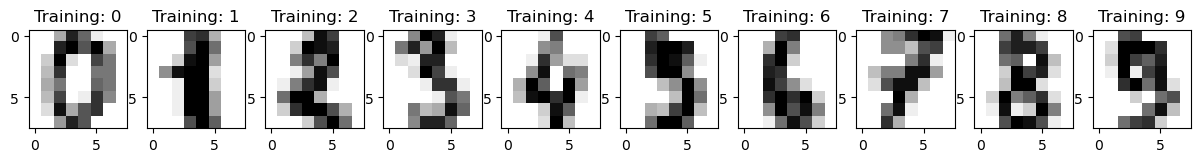

In [4]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [5]:
# Solution 3
# When the outcome has multiple classes, logistic regression can still be used,
# but it needs to be extended to handle multiple classes.
# This is known as multinomial logistic regression.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
clf_lr = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=10000)
clf_lr.fit(X_train, y_train)

# Evaluate the classifier on the test set
acc_lr = clf_lr.score(X_test, y_test)
print("Accuracy:", acc_lr.round(3))

Accuracy: 0.972


Random image is number: 96 and the corresponding target is: 9 and the corresponding image is:


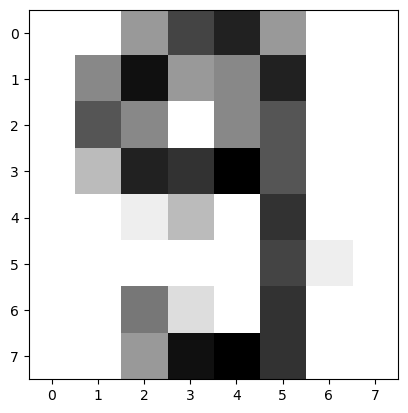

In [20]:
# Solution 4
# Load an image and reshape it to the correct shape

random_image = np.random.choice(range(len(X_test)))
print("Random image is number:", random_image, "and the corresponding target is:", y_test[random_image], "and the corresponding image is:")

img = X_test[random_image, :].reshape(1, -1)
img_to_disp = X_test[random_image, :].reshape(8, 8)

plt.imshow(img_to_disp, cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [21]:
# Make a prediction for the image
prediction = clf_lr.predict(img)
print("The prediction for the image is:", prediction[0])

The prediction for the image is: 9


In [8]:
# Solution 5a: Decision tree

from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

# Evaluate the classifier's accuracy on the test data
acc_dt = clf_dt.score(X_test, y_test)
print("Accuracy:", acc_dt.round(3))

Accuracy: 0.842


In [ ]:
# Solution 5b: K-nearest neighbors

from sklearn.neighbors import KNeighborsClassifier

# Train a K-nearest neighbors classifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

# Evaluate the classifier's accuracy on the test data
acc_knn = clf_knn.score(X_test, y_test)
print("Accuracy:", acc_knn.round(3))

In [23]:
# Solution 5c: Naive Bayes

from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes classifier
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

# Evaluate the classifier's accuracy on the test data
acc_nb = clf_nb.score(X_test, y_test)
print("Accuracy:", acc_nb.round(3))

Accuracy: 0.911


In [11]:
# Solution 5d: Support vector machine

from sklearn.svm import SVC

# Train a Support Vector Machine classifier
clf_svm = SVC()
clf_svm.fit(X_train, y_train)

# Evaluate the classifier's accuracy on the test data
acc_svm = clf_svm.score(X_test, y_test)
print("Accuracy:", acc_svm.round(3))

Accuracy: 0.986


In [24]:
# Solution 6: Hyperparameter tuning

# Decision tree classifier

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 6, 10]
}

# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# Setting min_samples_split to a higher value can make the tree more compact and reduce overfitting.
# On the other hand, setting it to a lower value can lead to more complex trees that may overfit the data.

# Initialize the classifier
dtc = DecisionTreeClassifier()
for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        dtc.set_params(max_depth=max_depth, min_samples_split=min_samples_split)
        dtc.fit(X_train, y_train)
        print("max_depth:", max_depth, "min_samples_split:", min_samples_split, " Accuracy:", dtc.score(X_test, y_test).round(4))

max_depth: 10 min_samples_split: 2  Accuracy: 0.8611
max_depth: 10 min_samples_split: 6  Accuracy: 0.8583
max_depth: 10 min_samples_split: 10  Accuracy: 0.85
max_depth: 20 min_samples_split: 2  Accuracy: 0.8472
max_depth: 20 min_samples_split: 6  Accuracy: 0.8583
max_depth: 20 min_samples_split: 10  Accuracy: 0.8417
max_depth: None min_samples_split: 2  Accuracy: 0.8694
max_depth: None min_samples_split: 6  Accuracy: 0.8611
max_depth: None min_samples_split: 10  Accuracy: 0.8444


In [13]:
# K-nearest neighbors classifier

# Define the para# Define the parameter grid
#param_grid = {
#    'n_neighbors': [3, 5, 7, 9, 11]
#}

# n_neighbors: Number of neighbors to used by the k-neighbors algorithm.

# Initialize the classifier
#knn = KNeighborsClassifier()
#for n_neighbors in param_grid['n_neighbors']:
#    knn.set_params(n_neighbors=n_neighbors)
#    knn.fit(X_train, y_train)
#    print("n_neighbors:", n_neighbors, " Accuracy:", knn.score(X_test, y_test).round(4))